In [2]:
# Import libraries
import time
import sagemaker
import boto3
import re
import json
import gzip
from sklearn.metrics import classification_report, confusion_matrix
import io
import pandas
from io import StringIO
import matplotlib.pyplot as plt
import math
from collections import Counter
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle
import nltk
# nltk.download("punkt")
import warnings
# warnings.filterwarnings('ignore')

In [13]:
!which python3

/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python3


In [61]:
with open("/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_test.csv", 'r') as f:
    result_test = pd.read_csv(f)

In [62]:
result_test = result_test[:-1]

## SVM model

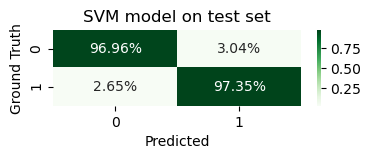

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model on test set')
plt.savefig("images/base_svm.png")
plt.show()

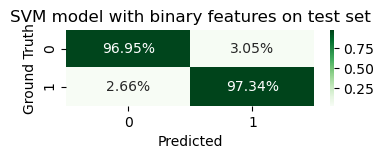

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model with binary features on test set')
plt.savefig("images/feature_svm.png")
plt.show()

---
## Random Forest Model

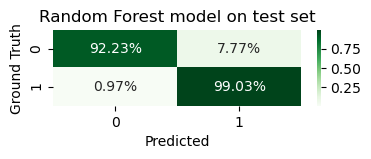

In [3]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model on test set')
plt.savefig("images/base_rf.png")
plt.show()

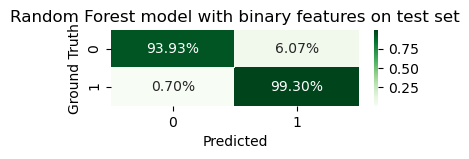

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model with binary features on test set')
plt.savefig("images/feature_rf.png")
plt.show()

---
## Logistic Regression Model

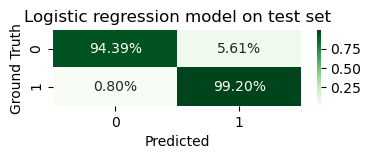

In [4]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic regression model on test set')
plt.savefig("images/base_lr.png")
plt.show()

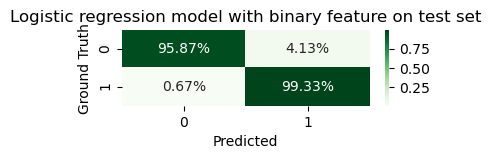

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic regression model with binary feature on test set')
plt.savefig("images/feature_lr.png")
plt.show()

---
## LSTM Model

In [22]:
preds = result_test['preds_lstm'].values
test_y = result_test['label'].values

print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9691
           1       0.99      0.99      0.99     14939

    accuracy                           0.99     24630
   macro avg       0.99      0.99      0.99     24630
weighted avg       0.99      0.99      0.99     24630



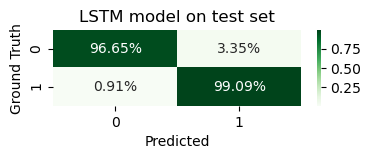

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model on test set')
plt.savefig("images/base_lstm.png")
plt.show()

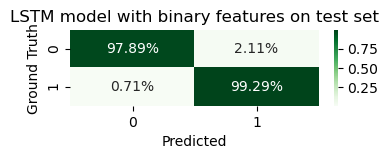

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model with binary features on test set')
plt.savefig("images/feature_lstm.png")
plt.show()

---
## DistilBERT Model

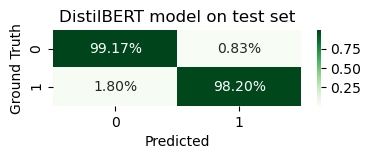

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model on test set')
plt.savefig("images/base_distilbert.png")
plt.show()

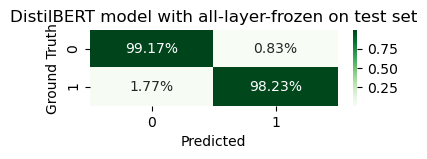

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_distilbert2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with all-layer-frozen on test set')
plt.savefig("images/feature_distilbert.png")
plt.show()

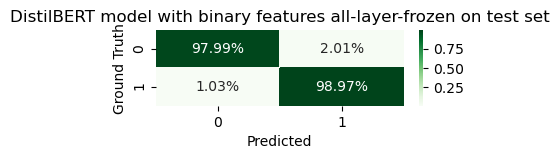

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_feature_distilbert3'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with binary features all-layer-frozen on test set')
plt.savefig("images/feature_distilbert.png")
plt.show()

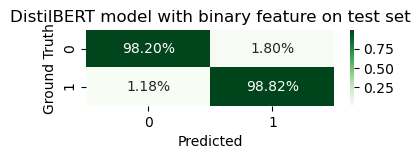

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with binary feature on test set')
plt.savefig("images/feature_distilbert.png")
plt.show()

---
## BERT Model

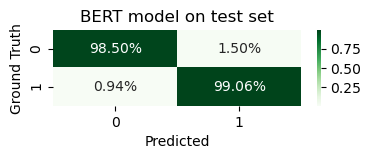

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_bert2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model on test set')
plt.show()

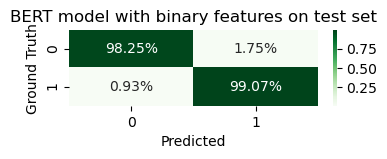

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_featurebert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with binary features on test set')
plt.show()

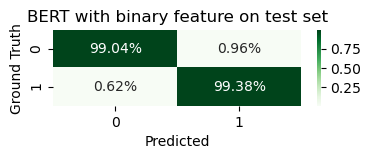

In [24]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_test['label'].values, result_test['preds_featurebert_2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT with binary feature on test set')
plt.savefig("images/feature_bert.png")
plt.show()

# Validation

In [45]:
with open("/home/ec2-user/SageMaker/email_phishing/Huaibo/data/data_v5_valid.csv", 'r') as f:
    result_valid = pd.read_csv(f)

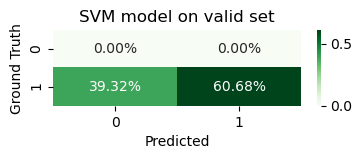

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model on valid set')
plt.savefig("images/valid_svm.png")
plt.show()

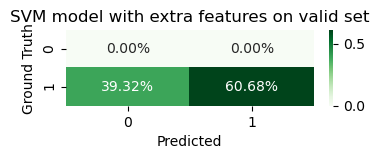

In [25]:
cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_svm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='SVM model with extra features on valid set')
plt.show()

---

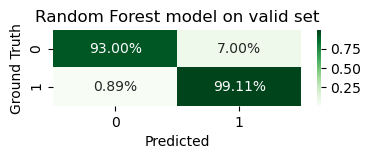

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model on valid set')
plt.savefig("images/valid_rf.png")
plt.show()

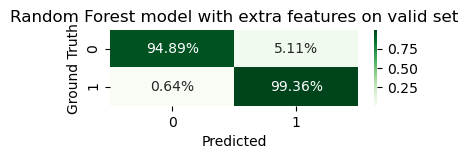

In [20]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_rf'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Random Forest model with extra features on valid set')
plt.show()

---

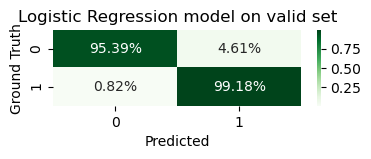

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic Regression model on valid set')
plt.savefig("images/valid_lr.png")
plt.show()

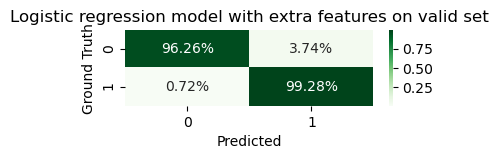

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_lr'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='Logistic regression model with extra features on valid set')
plt.show()

---

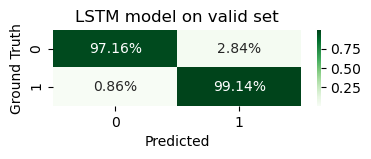

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model on valid set')
plt.savefig("images/valid_lstm.png")
plt.show()

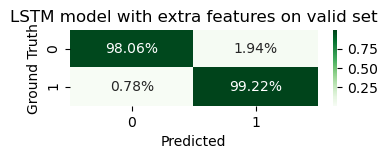

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_lstm'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='LSTM model with extra features on valid set')
# plt.savefig("images/valid_lstm.png")
plt.show()

---

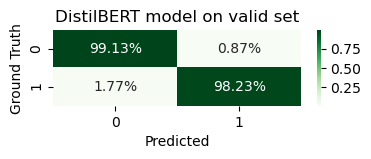

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model on valid set')
plt.savefig("images/valid_distilbert.png")
plt.show()

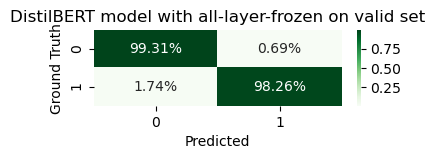

In [48]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_distilbert2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with all-layer-frozen on valid set')
plt.savefig("images/valid_distilbert.png")
plt.show()

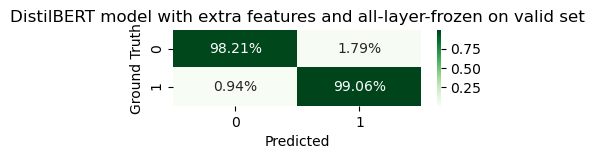

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_feature_distilbert3'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with extra features and all-layer-frozen on valid set')
plt.savefig("images/valid_distilbert.png")
plt.show()

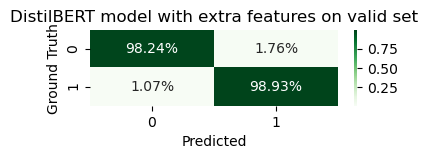

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_distilbert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='DistilBERT model with extra features on valid set')
plt.show()

---

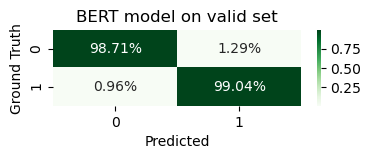

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_bert2'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model on valid set')
# plt.savefig("images/valid_bert.png")
plt.show()

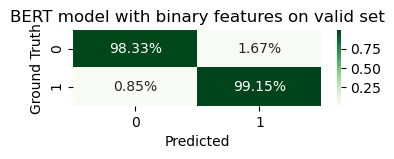

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_featurebert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='BERT model with binary features on valid set')
plt.show()

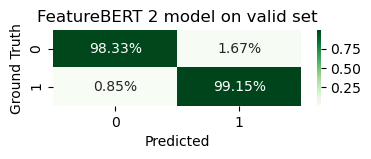

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_1 = confusion_matrix(result_valid['label'].values, result_valid['preds_featurebert'].values, normalize = 'true')
fig, (ax1) = plt.subplots(1,1, sharex=True, sharey=True,figsize=(4,1), dpi= 100, facecolor='w', edgecolor='k')
labels = ['0', '1']
cmap = sns.color_palette("Greens", as_cmap=True)
sns.heatmap(cm_1,annot=True, fmt=".2%", xticklabels = labels, yticklabels = labels, ax=ax1 ,cmap = cmap)
ax1.set(xlabel='Predicted', ylabel='Ground Truth', title='FeatureBERT 2 model on valid set')
plt.show()

In [12]:
result_test.columns

Index(['subject', 'URLs', 'HTMLs', 'IPs', 'Attachments', 'EmailAddress',
       'Receiver', 'label', 'is_same_domain', 'src', 'text',
       'has_sensitive_words', 'has_sus_link', 'has_ip_in_url', 'is_train',
       'abused_web', 'dns_host', 'preds_rf', 'preds_lr', 'preds_lstm',
       'preds_feature_rf', 'preds_feature_lr', 'preds_feature_lstm',
       'preds_bert', 'preds_bert2', 'preds_feature_svm', 'preds_featurebert',
       'preds_distilbert', 'preds_feature_distilbert'],
      dtype='object')

In [59]:
l1 = ['preds_rf', 'preds_lr', 'preds_lstm', 'preds_feature_distilbert', 'preds_bert2']
l2 = ['preds_feature_rf', 'preds_feature_lr', 'preds_feature_lstm', 'preds_distilbert', 'preds_featurebert']

In [50]:
with open("/home/ec2-user/SageMaker/email_phishing/Huaibo/data/results_test.csv", 'r') as f:
    result_test_v4 = pd.read_csv(f)

In [51]:
result_test_v4.columns

Index(['subject', 'URLs', 'HTMLs', 'IPs', 'Attachments', 'EmailAddress',
       'Receiver', 'label', 'is_same_domain', 'src', 'is_train', 'text',
       'preds_svm', 'preds_rf', 'preds_lr', 'preds_lstm', 'preds_distilbert',
       'preds_bert', 'preds_bert_3', 'preds_bert_1_extra',
       'has_sensitive_words', 'has_sus_link', 'has_ip_in_url',
       'preds_featurebert', 'preds_featurebert_2', 'preds_feature_lr',
       'preds_feature_rf', 'preds_feature_distilbert', 'preds_feature_svm',
       'preds_feature_lstm'],
      dtype='object')

In [54]:
l1 = ['preds_rf', 'preds_lr', 'preds_lstm', 'preds_distilbert', 'preds_bert']
l2 = ['preds_feature_rf', 'preds_feature_lr', 'preds_feature_lstm', 'preds_feature_distilbert', 'preds_featurebert']

In [63]:
from sklearn.metrics import f1_score
f1_base_test = []
f1_feat_test = []
for i in range(5):
    f1_base_test.append(f1_score(result_test.label, result_test[l1[i]], average='weighted'))
    f1_feat_test.append(f1_score(result_test.label, result_test[l2[i]], average='weighted'))
    

In [64]:
f1_base_test

[0.9778944238192397,
 0.9832432322768269,
 0.9865140727224482,
 0.9839295051819827,
 0.9896421759648432]

In [65]:
f1_feat_test

[0.9832739236489713,
 0.9870171156759597,
 0.9904037640144425,
 0.987193038507525,
 0.9892703868064079]

In [27]:
from sklearn.metrics import f1_score
f1_base_valid = []
f1_feat_valid = []
for i in range(5):
    f1_base_valid.append(f1_score(result_valid.label, result_valid[l1[i]], average='weighted'))
    f1_feat_valid.append(f1_score(result_valid.label, result_valid[l2[i]], average='weighted'))

In [57]:
f1_base_valid

[0.9797443510457572,
 0.9848427194659533,
 0.9878099195289488,
 0.9841977451707928,
 0.9898800512332058]

In [58]:
f1_feat_valid

[0.9853015236886068,
 0.9872239681322009,
 0.9900720131119796,
 0.9881295736086794,
 0.990027911173928]

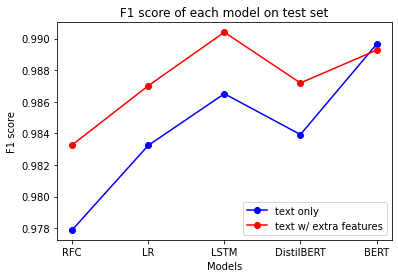

In [33]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]

# Plotting the line chart
plt.plot(x, f1_base_test, color='blue', marker='o', label='text only')
plt.plot(x, f1_feat_test, color='red', marker='o', label='text w/ extra features')

# Adding legends
plt.legend()

# Setting custom labels for the x-axis
x_labels = ['RFC', 'LR', 'LSTM', 'DistilBERT', 'BERT']
plt.xticks(x, x_labels)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.title('F1 score of each model on test set')
# plt.savefig("images/evaluations.png")
# Display the chart
plt.show()

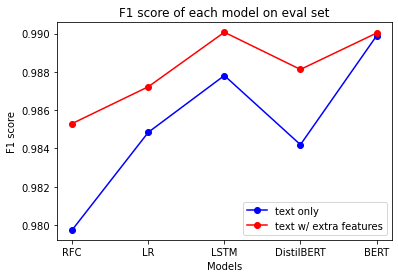

In [34]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]

# Plotting the line chart
plt.plot(x, f1_base_valid, color='blue', marker='o', label='text only')
plt.plot(x, f1_feat_valid, color='red', marker='o', label='text w/ extra features')

# Adding legends
plt.legend()

# Setting custom labels for the x-axis
x_labels = ['RFC', 'LR', 'LSTM', 'DistilBERT', 'BERT']
plt.xticks(x, x_labels)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.title('F1 score of each model on eval set')
# plt.savefig("images/evaluations.png")
# Display the chart
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc_base_test = []
acc_feat_test = []
for i in range(5):
    acc_base_test.append(accuracy_score(result_test.label, result_test[l1[i]]))
    acc_feat_test.append(accuracy_score(result_test.label, result_test[l2[i]]))

In [32]:
acc_base_valid = []
acc_feat_valid = []
for i in range(5):
    acc_base_valid.append(accuracy_score(result_valid.label, result_valid[l1[i]]))
    acc_feat_valid.append(accuracy_score(result_valid.label, result_valid[l2[i]]))

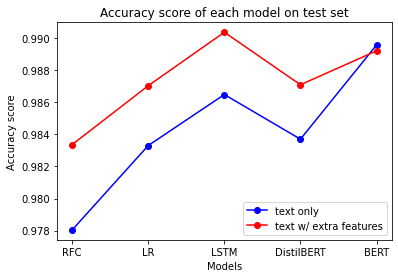

In [35]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]

# Plotting the line chart
plt.plot(x, acc_base_test, color='blue', marker='o', label='text only')
plt.plot(x, acc_feat_test, color='red', marker='o', label='text w/ extra features')

# Adding legends
plt.legend()

# Setting custom labels for the x-axis
x_labels = ['RFC', 'LR', 'LSTM', 'DistilBERT', 'BERT']
plt.xticks(x, x_labels)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.title('Accuracy score of each model on test set')
# plt.savefig("images/evaluations.png")
# Display the chart
plt.show()

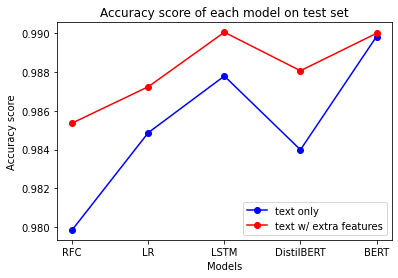

In [36]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]

# Plotting the line chart
plt.plot(x, acc_base_valid, color='blue', marker='o', label='text only')
plt.plot(x, acc_feat_valid, color='red', marker='o', label='text w/ extra features')

# Adding legends
plt.legend()

# Setting custom labels for the x-axis
x_labels = ['RFC', 'LR', 'LSTM', 'DistilBERT', 'BERT']
plt.xticks(x, x_labels)

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy score')
plt.title('Accuracy score of each model on test set')
# plt.savefig("images/evaluations.png")
# Display the chart
plt.show()

In [ ]:
result_valid.has_ip_in_link